## Fourier Tranforms

### Import resources and download images

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

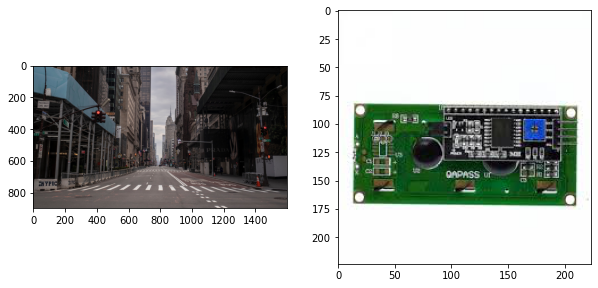

In [3]:
# Read in the images
image1 = cv2.imread('1.jpg')
# Change color to RGB (from BGR)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Read in the images
image2 = cv2.imread('2.jpg')
# Change color to RGB (from BGR)
image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)


# Display the images
f, (ax1,ax2) = plt.subplots(1, 2, figsize=(10,5))

ax1.imshow(image1)
ax2.imshow(image2)

### Convert to grayscale to focus on the intensity patterns in the image

In [4]:
gray1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

### Normalize the image color values from a range of [0,255] to [0,1] for further processing

In [6]:
norm1= gray1/255.0
norm2 = gray2/255.0

### Perform a fast fourier transform and create a scaled, frequency transform image

In [7]:
def ft_image(normnum):
    '''This function takes in a normalized, grayscale image
       and returns a frequency spectrum transform of that image. '''
    f = np.fft.fft2(normnum)
    fshift = np.fft.fftshift(f)
    frequency_tx = 20*np.log(np.abs(fshift))
    
    return frequency_tx

### Call the function on the normalized images and display the transforms

In [8]:
f1 = ft_image(norm1)
f2 = ft_image(norm2)

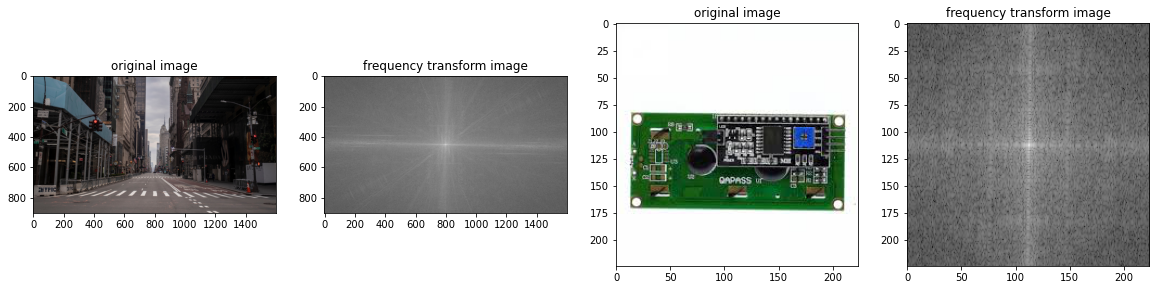

In [9]:
f, (ax1,ax2,ax3,ax4) = plt.subplots(1, 4, figsize=(20,10))

ax1.set_title('original image')
ax1.imshow(image1)
ax2.set_title('frequency transform image')
ax2.imshow(f1, cmap='gray')

ax3.set_title('original image')
ax3.imshow(image2)
ax4.set_title('frequency transform image')
ax4.imshow(f2, cmap='gray')

Note that the first and second images have components of all frequencies. You can see a bright spot in the center of the transformed image, which tells us that a large part of the image is at low frequency. The transformation image for the first photo indicates that there are two dominant directions for these frequencies; the vertical edges are represented by a horizontal line passing through the center of the frequency transformation image, and the horizontal edges are represented by a vertical line passing through the center.